In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)

# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [95]:
#index_col=0 para não repetir o índice
dados_clientes= pd.read_csv('previsao_de_renda.csv', index_col=0)

In [96]:
dados_clientes.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [97]:
#observando os tipos das variáveis:
dados_clientes.dtypes

data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

Como a seguir iremos necessitar realizar uma análise do comportamente das variáveis ao longo do tempo, iremos transformar o data_ref para datetime para facilitar as manipulações com a variável.

In [98]:
#transformando o data_ref para datetime. 
dados_clientes['data_ref'] = pd.to_datetime(dados_clientes['data_ref'])

In [99]:
#criando uma nova coluna 'mes' que terá apenas os meses das datas
dados_clientes['mes']=dados_clientes['data_ref'].dt.month

In [100]:
#criando nova coluna com o grupo de cada data de referência 
dados_clientes['grupo']=dados_clientes['mes']//3

In [101]:
#observando as divisões do grupo
dados_clientes.grupo.value_counts()

0    4000
1    4000
2    3000
3    3000
4    1000
Name: grupo, dtype: int64

Portanto, as datas foram divididas em 5 grupos diferentes. 

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [102]:
#separando as variáveis qualitativas
qualitativas=dados_clientes[['grupo','posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']]

   A seguir, serão criados 6 gráficos que fazem a análise das variáveis qualitativas selecionadas ao longo do tempo. 

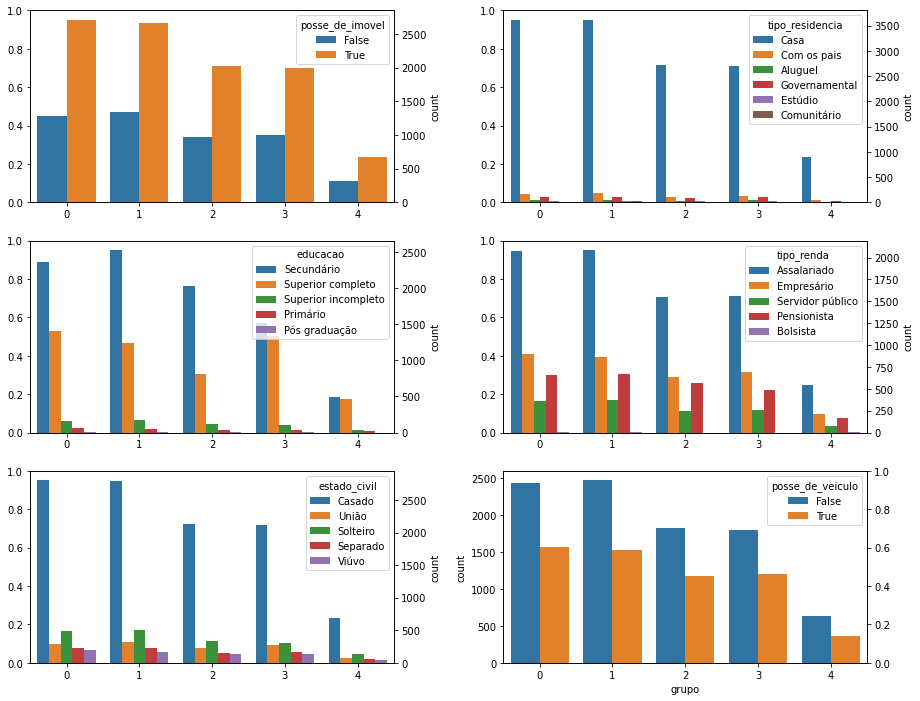

In [103]:
plt.rc('figure', figsize=(15, 12))

fig, axes = plt.subplots(3, 2)

# Gráfico 1: posse_de_veiculo
ax1 = axes[0,0]
ax = sns.countplot(x='grupo',  hue = 'posse_de_veiculo', data=qualitativas)
ax1b = ax1.twinx()

# Gráfico 2: posse_de_imovel
ax2 = axes[1,1]
ax = sns.countplot(x='grupo',  hue = 'posse_de_imovel', data=qualitativas)
ax2b = ax2.twinx()

# Gráfico 3: tipo_renda
ax3 = axes[0,1]
ax = sns.countplot(x='grupo',  hue = 'tipo_renda', data=qualitativas)
ax3b = ax3.twinx()

# Gráfico 4: tipo_residencia
ax4 = axes[1,0]
ax = sns.countplot(x='grupo',  hue = 'tipo_residencia', data=qualitativas)
ax4b = ax4.twinx()


# Gráfico 5: educação
ax5 = axes[2,0]
ax = sns.countplot(x='grupo',  hue = 'educacao', data=qualitativas)
ax5b = ax5.twinx()


# Gráfico 6: estado_civil
ax6 = axes[2,1]
ax = sns.countplot(x='grupo',  hue = 'estado_civil', data=qualitativas)
ax5b = ax6.twinx()

plt.subplots_adjust(wspace=.3, hspace=0.2)


Entre os gráficos analisados, o único que parece ter alterações é o gráfico educação. Vamos analisá-lo sozinho. 

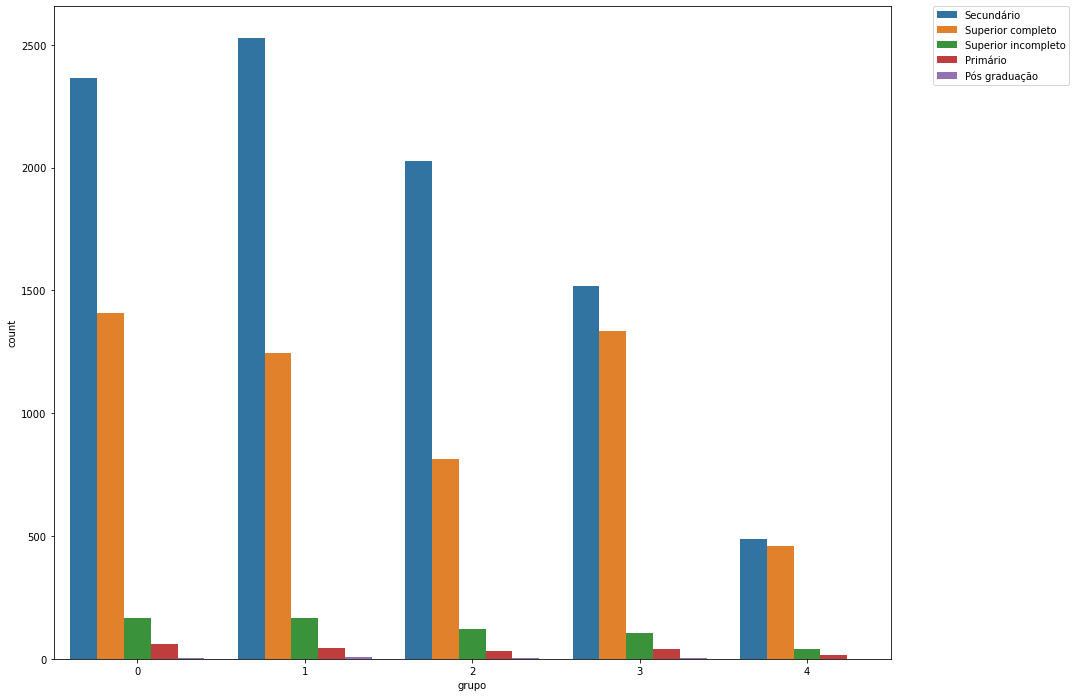

In [104]:
#gráfico do nível de educação ao longo do tempo.
ax = sns.countplot(x='grupo',  hue = 'educacao', data=qualitativas)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

O gráfico nos mostra que por um longo período de tempo o grau de instrução secundário foi muito superior aos demais, entretanto, felizmente, com o passar do tempo o ensino superior completo vêm ganhando cada vez mais espaço e o percentual de pessoas com ensino médio e superior tem se aproximado cada vez mais. 

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [105]:
#separando as variáveis quantitativas
quantitativas= dados_clientes[['grupo', 'qtd_filhos', 'idade', 'tempo_emprego','qt_pessoas_residencia', 'renda']]

In [106]:
dados_clientes.qtd_filhos.value_counts()

0     10358
1      2992
2      1458
3       165
4        19
14        4
7         2
5         2
Name: qtd_filhos, dtype: int64

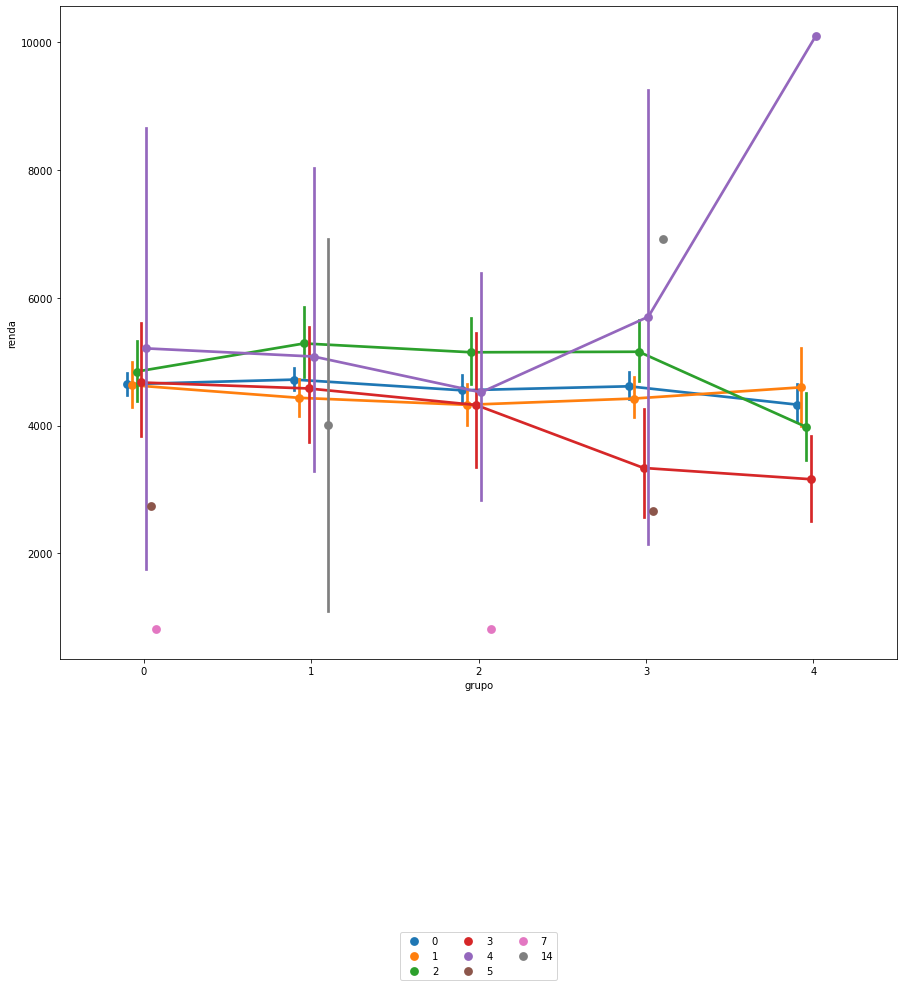

In [116]:
#plotando o gráfico das variaveis renda média x qtd_filhos.
ax = sns.pointplot(x="grupo", y="renda", hue = 'qtd_filhos',
                   data=quantitativas, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

A renda média de quem tem 0 a 2 filhos se manteve bem entre 4 e 6 mil reais ao longo dos meses, enquanto que a renda média de quem tem 3 filhos teve uma pequena queda. Já a renda média de quem tem 4 filhos teve um aumento significativo com o passar dos meses.
Acima de 4 filhos são frequências muito menores e que não permitem uma análise muito segura. 

Agora, para analisarmos o comportamento da variável renda com a variável idade, iremos agrupar as idades, para isso, iremos cortá-las com ajuda dos quartis. 

In [108]:
#visualização dos quartis.
quantitativas['idade'].describe()

count    15000.00000
mean        43.84140
std         11.22917
min         22.00000
25%         34.00000
50%         43.00000
75%         53.00000
max         68.00000
Name: idade, dtype: float64

In [109]:
#realizando o corte de faixa etária
quantitativas.idade=pd.cut(quantitativas['idade'], [22, 34, 43, 53, 68])

/tmp/ipykernel_57120/237345879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantitativas.idade=pd.cut(quantitativas['idade'], [22, 34, 43, 53, 68])


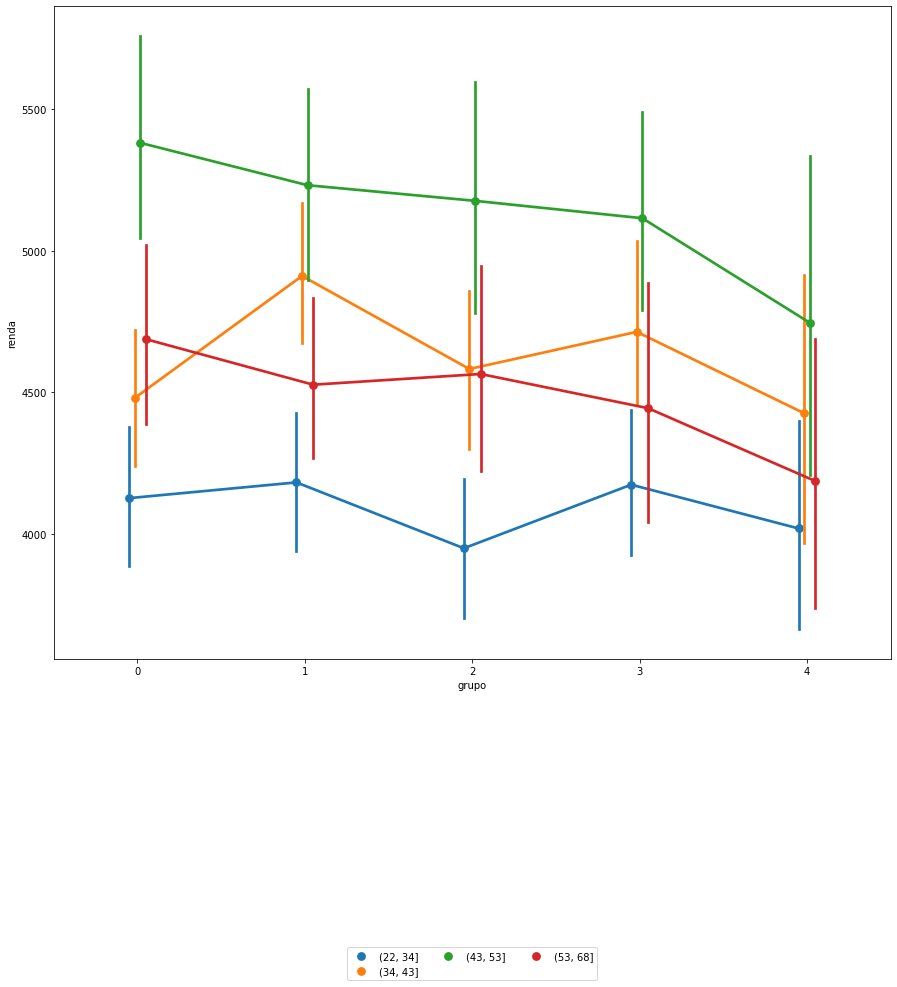

In [110]:
#plotando o gráfico das variaveis renda média x idade.
ax = sns.pointplot(x="grupo", y="renda", hue = 'idade',
                   data=quantitativas, dodge=True, ci = 95)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

O gráfico nos mostra que a menor renda média, durante todo o período de análise, pertence à categoria de idade entre 22 e 34 anos, ou seja, os mais novos. Já a categoria (34,43] iniciou sendo a segunda menor renda, mas rapidamente superou a renda do grupo (53,63] sendo agora a segunda maior renda. A categoria (43,53] manteve-se desde o início com a média de maior renda, entretanto, com o tempo essa renda média teve uma queda. 

A seguir, faremos a análise utilizando a variável tempo de emprego:

In [111]:
#observando informações da variável para posterior corte. 
quantitativas.tempo_emprego.describe()

count    12466.000000
mean         7.750462
std          6.780216
min          0.191781
25%          3.016438
50%          6.016438
75%         10.183562
max         42.906849
Name: tempo_emprego, dtype: float64

In [112]:
#cortando a variável nos quartis
quantitativas.tempo_emprego=pd.cut(quantitativas['tempo_emprego'], [0,3,6,10,42])

/tmp/ipykernel_57120/1534309759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantitativas.tempo_emprego=pd.cut(quantitativas['tempo_emprego'], [0,3,6,10,42])


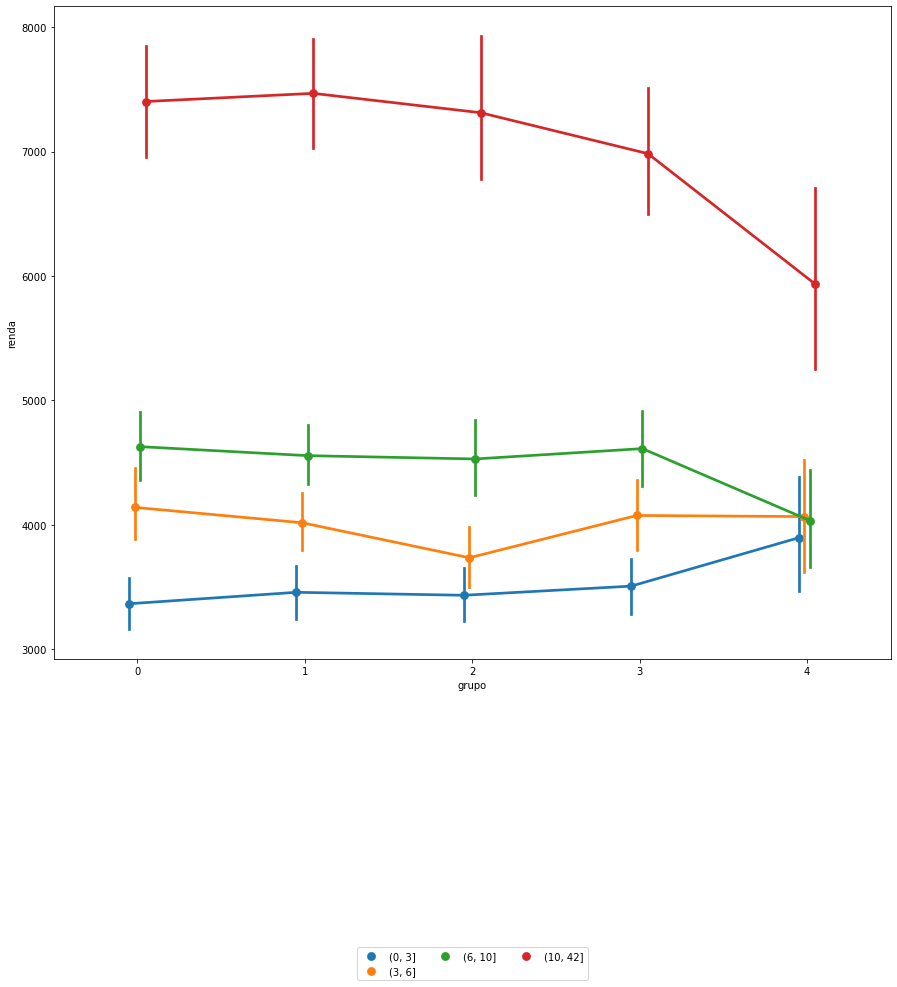

In [113]:
#plotando o gráfico das variaveis renda média x tempo_emprego.
ax = sns.pointplot(x="grupo", y="renda", hue = 'tempo_emprego',
                   data=quantitativas, dodge=True, ci = 95)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

O gráfico nos deixa evidente que quanto maior o tempo de emprego, maior a renda. Entretanto, com o passar do tempo de análise, as rendas das pessoas que tem até 10 anos de emprego começaram a ficar muito próximas, diferente do que se via no incio da análise. Também em consonância com isso, a renda média das pessoas com mais de 10 anos de emprego também começou a diminuir significativamente. Seria esse um apontamento que futuramente o tempo de emprego não trará mais um diferencial de renda tão grande? 

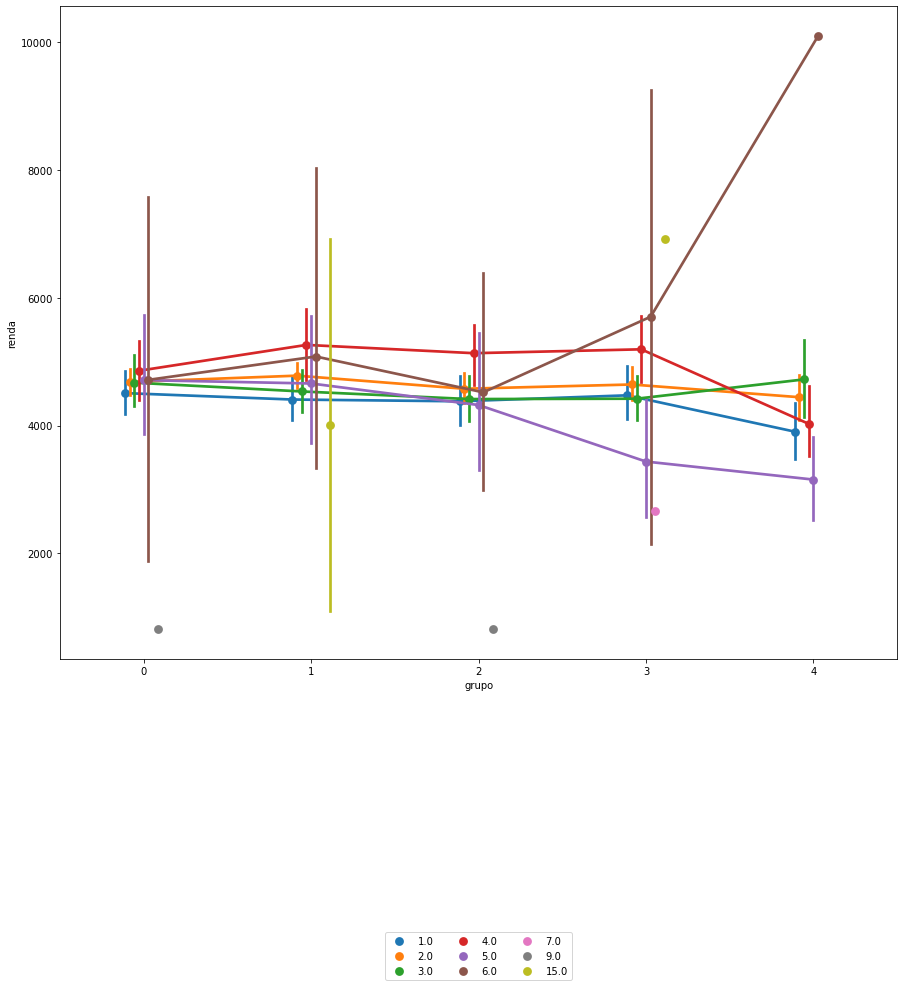

In [114]:
#plotando o gráfico das variaveis renda média x qt_pessoas_residencia..
ax = sns.pointplot(x="grupo", y="renda", hue = 'qt_pessoas_residencia',
                   data=quantitativas, dodge=True, ci = 95)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

O último gráfico de análise nos mostra uma queda na renda de quem possui 5 pessoas na residencia e um aumento significativo na renda de quem possui 6 pessoas na residência, mas como há poucas pessoas na amostra que possuem 6 pessoas na residência, fica mais difícil dizer se a análise é realmente confiável. 

In [115]:
quantitativas['qt_pessoas_residencia'].loc[6.0]

2.0

   De acordo com as análises realizadas nas variáveis qualitativas, acredito que foi possível perceber que o grau de educação dos clientes desse banco vem se alterando, aonde o ensino médio começa a dar lugar para o ensino superior. 

Para as análises das variáveis quantitativas foi possível perceber que o tempo de emprego e a renda estão diretamente associados, entretanto, a média de renda vem diminuindo com o passar do tempo.
Já para a variável idade, o grupo de pessoas mais novas tem as menores rendas, enquanto que o intervalo de idade 43 a 53 anos possui a maior média de renda, mesmo que ela esteja diminuindo com o tempo. 

Com base na análise, a fim de inferir quais clientes ganhariam as maiores margens de crédito, diria que seriam os clientes com idade entre 43 e 53 anos e com mais de 10 anos de tempo de emprego. 